<a href="https://colab.research.google.com/github/davidatoms/ai-research-code/blob/master/LotkaVolterraLanguageEvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

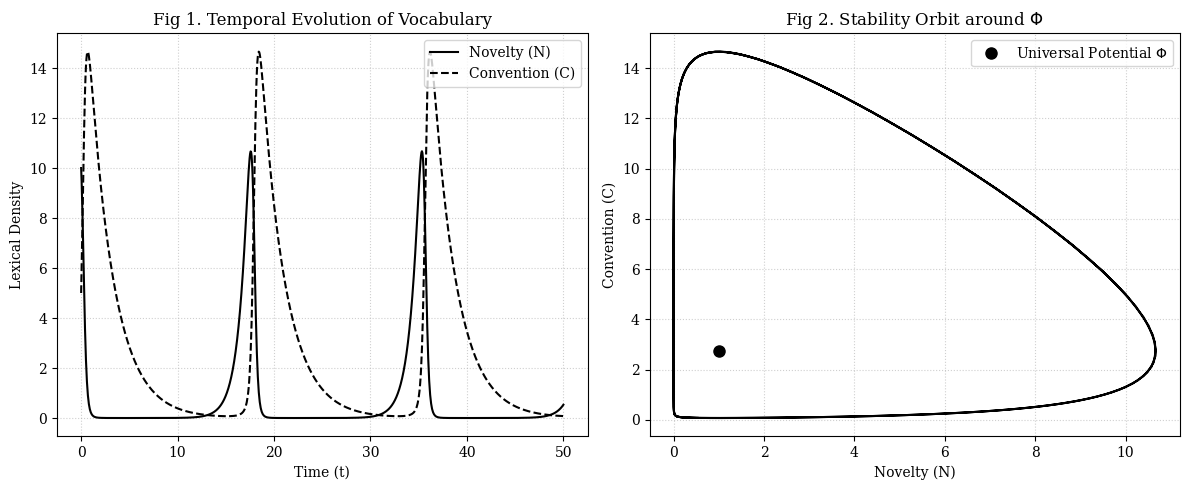

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- PARAMETERS ---
# alpha: Rate of new slang/word creation (Creativity)
# beta: Rate at which grammar/dictionaries "capture" new words
# delta: Rate at which dictionary grows by capturing words
# gamma: Rate at which old words die (Archaism)
alpha, beta, delta, gamma = 1.1, 0.4, 0.4, 0.4

# Initial populations
# N0: High novelty (a time of rapid cultural change)
# C0: Moderate convention
y0 = [10, 5]
t = np.linspace(0, 50, 1000)

# Lotka-Volterra Equations
def deriv(y, t, alpha, beta, delta, gamma):
    N, C = y
    dNdt = alpha * N - beta * N * C
    dCdt = delta * N * C - gamma * C
    return dNdt, dCdt

# Integrate
ret = odeint(deriv, y0, t, args=(alpha, beta, delta, gamma))
N, C = ret.T

# --- PLOTTING (Academic Style) ---
plt.rcParams['font.family'] = 'serif'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Time Series (The History of Language)
ax1.plot(t, N, 'k-', label='Novelty (N)', linewidth=1.5)
ax1.plot(t, C, 'k--', label='Convention (C)', linewidth=1.5)
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Lexical Density')
ax1.set_title('Fig 1. Temporal Evolution of Vocabulary')
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)

# Plot 2: Phase Portrait (The Universal Potential Orbit)
ax2.plot(N, C, 'k-', linewidth=1.5)
ax2.set_xlabel('Novelty (N)')
ax2.set_ylabel('Convention (C)')
ax2.set_title(r'Fig 2. Stability Orbit around $\Phi$')
ax2.grid(True, linestyle=':', alpha=0.6)

# Mark the center (The Fixed Point / Universal Potential)
center_N = gamma / delta
center_C = alpha / beta
ax2.plot(center_N, center_C, 'ko', markersize=8, label=r'Universal Potential $\Phi$')
ax2.legend()

plt.tight_layout()
plt.savefig('language_dynamics_lv.png', dpi=300)